In [407]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
from scipy.stats import pearsonr
import pandas as pd
from PIL import Image
from IPython.display import display, HTML

## Function Definitions

In [408]:
def reverse_random_3_values(arr):
    arr_copy = np.copy(arr)
    indices = np.random.choice(arr_copy.size, 3, replace=False)
    arr_copy.ravel()[indices] *= -1
    return arr_copy
def awgn(signal, snr):
    db_signal = 10 * np.log10(np.mean(signal ** 2))
    db_noise = db_signal - snr
    noise_power = 10 ** (db_noise / 10)
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    return signal + noise

## PART 1

#### 1. Create Number Patterns

In [409]:
p1=np.array([[ 1 ,-1 ,-1, -1, -1, 1,
              -1, 1, 1, 1, 1, -1,
              -1, 1, 1, 1, 1, -1, 
              -1 ,1 ,1, 1, 1, -1, 
               1 ,-1 ,-1, -1, -1 ,1]])
p2=np.array([[1, 1, 1, 1, 1, 1,
             -1, 1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, -1,
              1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1,]])
p3=np.array([[-1, 1, 1, 1, 1, 1,
             -1, 1, 1, -1, -1, -1,
             -1, 1, 1, -1, 1, -1,
              1, -1, -1, 1, 1, -1,
              1, 1, 1, 1, 1, -1,]])
P=np.hstack((p1.T, p2.T, p3.T))
T=P
p1_norm=sklearn.preprocessing.normalize(p1)
p2_norm=sklearn.preprocessing.normalize(p2)
p3_norm=sklearn.preprocessing.normalize(p3)
#print(p3_norm)
Pnorm = np.hstack((p1_norm.T, p2_norm.T, p3_norm.T))
#print(Pnorm)
#print(T)

p1_reshaped = np.reshape(p1,(5,6)).T
p2_reshaped = np.reshape(p2,(5,6)).T
p3_reshaped = np.reshape(p3,(5,6)).T

#### 2. Create Weight Matrix (Hebbian)

In [410]:
W_hebb=np.dot(T,Pnorm.T)
print (W_hebb)

[[ 0.54772256 -0.18257419 -0.18257419 -0.18257419 -0.18257419  0.18257419
  -0.18257419  0.18257419  0.18257419  0.54772256  0.54772256  0.18257419
  -0.18257419 -0.18257419 -0.18257419  0.18257419 -0.18257419 -0.18257419
  -0.18257419  0.54772256  0.54772256  0.18257419  0.18257419  0.18257419
   0.18257419 -0.18257419 -0.18257419 -0.18257419 -0.18257419  0.54772256]
 [-0.18257419  0.54772256  0.54772256  0.54772256  0.54772256  0.18257419
  -0.18257419  0.18257419  0.18257419 -0.18257419 -0.18257419  0.18257419
  -0.18257419 -0.18257419 -0.18257419 -0.54772256 -0.18257419 -0.18257419
   0.54772256 -0.18257419 -0.18257419  0.18257419  0.18257419  0.18257419
   0.18257419  0.54772256  0.54772256  0.54772256  0.54772256 -0.18257419]
 [-0.18257419  0.54772256  0.54772256  0.54772256  0.54772256  0.18257419
  -0.18257419  0.18257419  0.18257419 -0.18257419 -0.18257419  0.18257419
  -0.18257419 -0.18257419 -0.18257419 -0.54772256 -0.18257419 -0.18257419
   0.54772256 -0.18257419 -0.1825741

#### 3. Reverse 3 pixels for each pattern/Normalize

In [411]:
p1_noise = reverse_random_3_values(p1)
p2_noise = reverse_random_3_values(p2)
p3_noise = reverse_random_3_values(p3)
p1_noise_norm=sklearn.preprocessing.normalize(p1_noise)
p2_noise_norm=sklearn.preprocessing.normalize(p2_noise)
p3_noise_norm=sklearn.preprocessing.normalize(p3_noise)
print(p1_noise_norm)

p1_noise_reshaped = np.reshape(p1_noise,(5,6)).T
p2_noise_reshaped = np.reshape(p2_noise,(5,6)).T
p3_noise_reshaped = np.reshape(p3_noise,(5,6)).T

[[ 0.18257419 -0.18257419 -0.18257419 -0.18257419 -0.18257419  0.18257419
  -0.18257419  0.18257419 -0.18257419  0.18257419  0.18257419 -0.18257419
  -0.18257419  0.18257419 -0.18257419 -0.18257419  0.18257419 -0.18257419
  -0.18257419  0.18257419  0.18257419  0.18257419  0.18257419 -0.18257419
   0.18257419 -0.18257419 -0.18257419 -0.18257419 -0.18257419  0.18257419]]


#### 4. Hebbian Noisy Input Test

In [412]:
output_1=np.dot(W_hebb,p1_noise_norm.T)
output_2=np.dot(W_hebb,p2_noise_norm.T)
output_3=np.dot(W_hebb,p3_noise_norm.T)
#print(output_1)
#print(output_2)

In [413]:
output1_reshaped = np.reshape(output_1,(5,6)).T
output2_reshaped = np.reshape(output_2,(5,6)).T
output3_reshaped = np.reshape(output_3,(5,6)).T
print(output1_reshaped)

[[ 1.         -0.73333333 -0.73333333 -0.86666667  0.73333333]
 [-0.86666667  0.73333333  0.6         1.         -0.86666667]
 [-0.86666667  0.73333333  0.6         1.         -0.86666667]
 [-0.86666667  1.          0.86666667  0.73333333 -0.86666667]
 [-0.86666667  1.          0.6         0.73333333 -0.86666667]
 [ 0.73333333 -0.6        -0.73333333 -0.6         1.        ]]


#### 5. Hebbian Correlation Table 

In [414]:
corr11_hebb,_=pearsonr(p1.ravel(), output_1.ravel())
corr12_hebb,_=pearsonr(p1.ravel(), output_2.ravel())
corr13_hebb,_=pearsonr(p1.ravel(), output_3.ravel())
corr21_hebb,_=pearsonr(p2.ravel(), output_1.ravel())
corr22_hebb,_=pearsonr(p2.ravel(), output_2.ravel())
corr23_hebb,_=pearsonr(p2.ravel(), output_3.ravel())
corr31_hebb,_=pearsonr(p3.ravel(), output_1.ravel())
corr32_hebb,_=pearsonr(p3.ravel(), output_2.ravel())
corr33_hebb,_=pearsonr(p3.ravel(), output_3.ravel())
#print(corr33_hebb)
data_hebb = [
    [corr11_hebb, corr12_hebb, corr13_hebb],
    [corr21_hebb, corr22_hebb,corr23_hebb], 
    [corr31_hebb, corr32_hebb, corr33_hebb],
]
tb_hebb = pd.DataFrame(data_hebb)
tb_hebb.columns = ['Output 1','Output 2','Output 3']
tb_hebb.index = ['Pattern 1','Pattern 2','Pattern 3']
pd.set_option('display.float_format', '{:.6f}'.format)
print(tb_hebb)

           Output 1  Output 2  Output 3
Pattern 1  0.986937  0.014029 -0.086119
Pattern 2 -0.003000  0.916194  0.490839
Pattern 3 -0.226469  0.561666  0.949617


In [415]:
#pseudo inverse
p_plus=np.dot(np.linalg.inv(np.dot(P.T,P)),P.T)
W_pseudo=np.dot(T,p_plus)
print(W_pseudo)

[[ 0.11858974 -0.02884615 -0.02884615 -0.02884615 -0.02884615  0.03205128
  -0.03205128  0.03205128  0.03205128  0.11858974  0.11858974  0.05769231
  -0.03205128 -0.05769231 -0.05769231  0.02884615 -0.05769231 -0.03205128
  -0.02884615  0.11858974  0.11858974  0.03205128  0.03205128  0.05769231
   0.03205128 -0.02884615 -0.02884615 -0.02884615 -0.02884615  0.11858974]
 [-0.02884615  0.08269231  0.08269231  0.08269231  0.08269231  0.01923077
  -0.01923077  0.01923077  0.01923077 -0.02884615 -0.02884615  0.03461538
  -0.01923077 -0.03461538 -0.03461538 -0.08269231 -0.03461538 -0.01923077
   0.08269231 -0.02884615 -0.02884615  0.01923077  0.01923077  0.03461538
   0.01923077  0.08269231  0.08269231  0.08269231  0.08269231 -0.02884615]
 [-0.02884615  0.08269231  0.08269231  0.08269231  0.08269231  0.01923077
  -0.01923077  0.01923077  0.01923077 -0.02884615 -0.02884615  0.03461538
  -0.01923077 -0.03461538 -0.03461538 -0.08269231 -0.03461538 -0.01923077
   0.08269231 -0.02884615 -0.0288461

#### 6. Pseudo Inverse Noisy Input Test

In [416]:
output_1_pseudo=np.dot(W_pseudo,p1_noise_norm.T)
output_2_pseudo=np.dot(W_pseudo,p2_noise_norm.T)
output_3_pseudo=np.dot(W_pseudo,p3_noise_norm.T)
output1_pseudo_reshaped = np.reshape(output_1_pseudo,(5,6)).T
output2_pseudo_reshaped = np.reshape(output_2_pseudo,(5,6)).T
output3_pseudo_reshaped = np.reshape(output_3_pseudo,(5,6)).T


#### 7. Pseudo Inverse Correlation Table

In [417]:
corr11_pseudo,_=pearsonr(p1.ravel(), output_1_pseudo.ravel())
corr12_pseudo,_=pearsonr(p1.ravel(), output_2_pseudo.ravel())
corr13_pseudo,_=pearsonr(p1.ravel(), output_3_pseudo.ravel())
corr21_pseudo,_=pearsonr(p2.ravel(), output_1_pseudo.ravel())
corr22_pseudo,_=pearsonr(p2.ravel(), output_2_pseudo.ravel())
corr23_pseudo,_=pearsonr(p2.ravel(), output_3_pseudo.ravel())
corr31_pseudo,_=pearsonr(p3.ravel(), output_1_pseudo.ravel())
corr32_pseudo,_=pearsonr(p3.ravel(), output_2_pseudo.ravel())
corr33_pseudo,_=pearsonr(p3.ravel(), output_3_pseudo.ravel())
#print(corr33_hebb)
data_pseudo = [
    [corr11_pseudo, corr12_pseudo, corr13_pseudo],
    [corr21_pseudo, corr22_pseudo,corr23_pseudo], 
    [corr31_pseudo, corr32_pseudo, corr33_pseudo],
]
tb_pseudo = pd.DataFrame(data_pseudo)
tb_pseudo.columns = ['Output 1','Output 2','Output 3']
tb_pseudo.index = ['Pattern 1','Pattern 2','Pattern 3']
pd.set_option('display.float_format', '{:.6f}'.format)
print(tb_pseudo)

           Output 1  Output 2  Output 3
Pattern 1  0.989183  0.054741 -0.019348
Pattern 2  0.033438  0.977345  0.323126
Pattern 3 -0.189920  0.366149  0.988712


## Plot

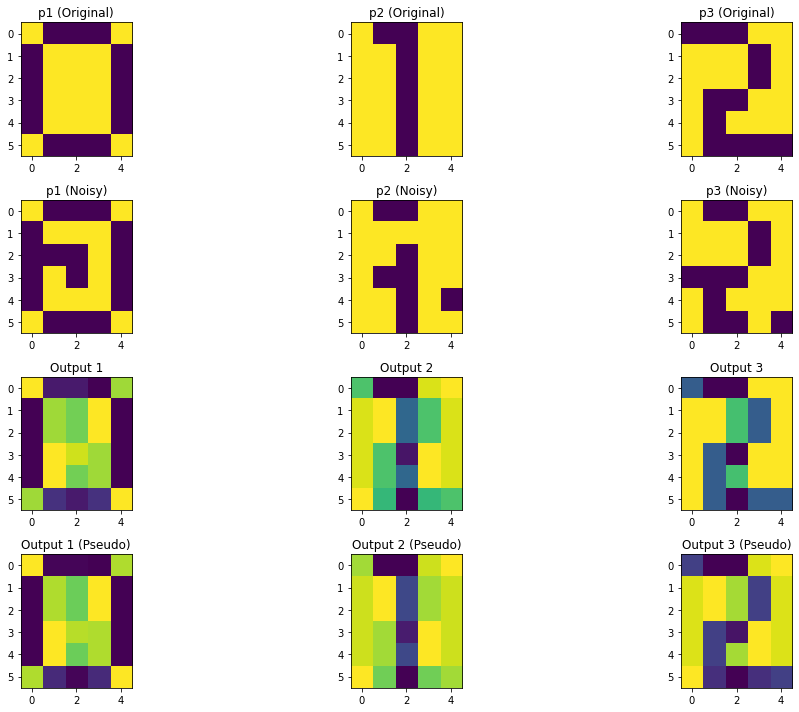

In [418]:
plt.figure(figsize=(16, 10))  # Adjust the figure size

# First row: original patterns
images_original = [p1_reshaped, p2_reshaped, p3_reshaped]
titles_original = ['p1 (Original)', 'p2 (Original)', 'p3 (Original)']

for i in range(3):
    plt.subplot(4, 3, i+1)
    plt.imshow(images_original[i])
    plt.title(titles_original[i])

# Second row: noisy patterns
images_noisy = [p1_noise_reshaped, p2_noise_reshaped, p3_noise_reshaped]
titles_noisy = ['p1 (Noisy)', 'p2 (Noisy)', 'p3 (Noisy)']

for i in range(3):
    plt.subplot(4, 3, 3 + i+1)  # Start from the 4th position
    plt.imshow(images_noisy[i])
    plt.title(titles_noisy[i])

# Third row: outputs
images_output = [output1_reshaped, output2_reshaped, output3_reshaped]
titles_output = ['Output 1', 'Output 2', 'Output 3']

for i in range(3):
    plt.subplot(4, 3, 6 + i+1)  # Start from the 7th position
    plt.imshow(images_output[i])
    plt.title(titles_output[i])

# Fourth row: pseudo outputs
images_pseudo = [output1_pseudo_reshaped, output2_pseudo_reshaped, output3_pseudo_reshaped]
titles_pseudo = ['Output 1 (Pseudo)', 'Output 2 (Pseudo)', 'Output 3 (Pseudo)']

for i in range(3):
    plt.subplot(4, 3, 9 + i+1)  # Start from the 10th position
    plt.imshow(images_pseudo[i])
    plt.title(titles_pseudo[i])

plt.tight_layout()  # To prevent overlap
plt.show()

## Correlation Tables 

In [419]:


# Sample DataFrames for Hebbian and Pseudo Inverse Correlation
tb_hebb = pd.DataFrame(data_hebb)
tb_hebb.columns = ['Output 1', 'Output 2', 'Output 3']
tb_hebb.index = ['Pattern 1', 'Pattern 2', 'Pattern 3']

tb_pseudo = pd.DataFrame(data_pseudo)
tb_pseudo.columns = ['Output 1', 'Output 2', 'Output 3']
tb_pseudo.index = ['Pattern 1', 'Pattern 2', 'Pattern 3']

pd.set_option('display.float_format', '{:.6f}'.format)

def create_vertically_aligned_tables(hebbian, pseudo_inverse):
    hebb_table = hebbian.to_html(classes='hebb')
    pseudo_table = pseudo_inverse.to_html(classes='pseudo')
    
    html_str = f"""
    <h3>Hebbian Correlation</h3>
    {hebb_table}
    <br><br>
    <h3>Pseudo Inverse Correlation</h3>
    {pseudo_table}
    """

    display(HTML(html_str))

# Call the function to display the tables
create_vertically_aligned_tables(tb_hebb, tb_pseudo)



,Output 1,Output 2,Output 3
Pattern 1,0.986937,0.014029,-0.086119
Pattern 2,-0.003000,0.916194,0.490839
Pattern 3,-0.226469,0.561666,0.949617
,Output 1,Output 2,Output 3
Pattern 1,0.989183,0.054741,-0.019348
Pattern 2,0.033438,0.977345,0.323126
Pattern 3,-0.189920,0.366149,0.988712


## PART 2

In [420]:
beyonce = Image.open(r"C:\Users\patsh\Downloads\beyonce.jpg").convert('L')
einstein = Image.open(r"C:\Users\patsh\Downloads\einstein.jpg").convert('L')
marie = Image.open(r"C:\Users\patsh\Downloads\marie-curie.jpg").convert('L')
michael = Image.open(r"C:\Users\patsh\Downloads\michael-jackson.jpg").convert('L')
queen = Image.open(r"C:\Users\patsh\Downloads\queen.jpg").convert('L')

original_elements = np.asarray(marie_curie).size
print(original_elements)

beyonce_data=np.reshape(np.array(beyonce),(4096,1))
einstein_data=np.reshape(np.array(einstein),(4096,1))
marie_data=np.reshape(np.array(marie),(4096,1))
michael_data=np.reshape(np.array(michael),(4096,1))
queen_data=np.reshape(np.array(queen),(4096,1))

beyonce_norm = np.reshape(preprocessing.normalize(beyonce), (4096, 1))
einstein_norm = np.reshape(preprocessing.normalize(einstein), (4096, 1))
marie_norm = np.reshape(preprocessing.normalize(marie), (4096, 1))
michael_norm = np.reshape(preprocessing.normalize(michael), (4096, 1))
queen_norm = np.reshape(preprocessing.normalize(queen), (4096, 1))

P_celeb= np.hstack((beyonce_data, einstein_data, marie_data, michael_data, queen_data))
T_celeb=P_celeb
P_celeb_norm=np.hstack((beyonce_norm, einstein_norm, marie_norm, michael_norm,queen_norm))

4096


#### Create Weight Matrix (Hebbian)

In [421]:
W_celeb_hebb=np.dot(T_celeb,P_celeb_norm.T)
print (W_celeb_hebb)

[[ 25.93192502  26.31600554  26.30483202 ...  39.69772233  39.34205827
   37.11793235]
 [ 26.31600554  26.71261968  26.71039259 ...  40.7725993   40.45372225
   38.11059798]
 [ 26.30483202  26.71039259  26.72400017 ...  41.37497006  41.11630567
   38.63444733]
 ...
 [ 62.71454429  64.19071796  64.92823474 ... 125.77321736 127.30658942
  117.76035341]
 [ 62.17654753  63.66940662  64.43930137 ... 127.30658942 129.07751512
  119.07323456]
 [ 59.37900962  60.79520145  61.49983352 ... 117.76035341 119.07323456
  110.85479256]]


#### Noisy Celebrity Data

In [422]:
beyonce_noisy=np.reshape(awgn(preprocessing.normalize(np.array(beyonce)), 20), (4096, 1))
einstein_noisy=np.reshape(awgn(preprocessing.normalize(np.array(einstein)), 20), (4096, 1))
marie_noisy=np.reshape(awgn(preprocessing.normalize(np.array(marie)), 20), (4096, 1))
michael_noisy=np.reshape(awgn(preprocessing.normalize(np.array(michael)), 20), (4096, 1))
queen_noisy=np.reshape(awgn(preprocessing.normalize(np.array(queen)), 20), (4096, 1))


#### Hebbian Noisy Celebrity Test

In [423]:
# Calculate the images
beyonce_hebb = np.dot(W_celeb_hebb, beyonce_noisy)
einstein_hebb = np.dot(W_celeb_hebb, einstein_noisy)
marie_hebb = np.dot(W_celeb_hebb, marie_noisy)
michael_hebb = np.dot(W_celeb_hebb, michael_noisy)
queen_hebb = np.dot(W_celeb_hebb, queen_noisy)


#### Hebbian Correlation 

In [424]:
corr11_hebb,_=pearsonr(beyonce_data.ravel(), beyonce_hebb.ravel())
corr12_hebb,_=pearsonr(beyonce_data.ravel(), einstein_hebb.ravel())
corr13_hebb,_=pearsonr(beyonce_data.ravel(), marie_hebb.ravel())
corr14_hebb,_=pearsonr(beyonce_data.ravel(), michael_hebb .ravel())
corr15_hebb,_=pearsonr(beyonce_data.ravel(), queen_hebb.ravel())

corr21_hebb,_=pearsonr(einstein_data.ravel(), beyonce_hebb.ravel())
corr22_hebb,_=pearsonr(einstein_data.ravel(), einstein_hebb.ravel())
corr23_hebb,_=pearsonr(einstein_data.ravel(), marie_hebb.ravel())
corr24_hebb,_=pearsonr(einstein_data.ravel(), michael_hebb .ravel())
corr25_hebb,_=pearsonr(einstein_data.ravel(), queen_hebb.ravel())

corr31_hebb,_=pearsonr(marie_data.ravel(), beyonce_hebb.ravel())
corr32_hebb,_=pearsonr(marie_data.ravel(), einstein_hebb.ravel())
corr33_hebb,_=pearsonr(marie_data.ravel(), marie_hebb.ravel())
corr34_hebb,_=pearsonr(marie_data.ravel(), michael_hebb .ravel())
corr35_hebb,_=pearsonr(marie_data.ravel(), queen_hebb.ravel())

corr41_hebb,_=pearsonr(michael_data.ravel(), beyonce_hebb.ravel())
corr42_hebb,_=pearsonr(michael_data.ravel(), einstein_hebb.ravel())
corr43_hebb,_=pearsonr(michael_data.ravel(), marie_hebb.ravel())
corr44_hebb,_=pearsonr(michael_data.ravel(), michael_hebb.ravel())
corr45_hebb,_=pearsonr(michael_data.ravel(), queen_hebb.ravel())

corr51_hebb,_=pearsonr(queen_data.ravel(), beyonce_hebb.ravel())
corr52_hebb,_=pearsonr(queen_data.ravel(), einstein_hebb.ravel())
corr53_hebb,_=pearsonr(queen_data.ravel(), marie_hebb.ravel())
corr54_hebb,_=pearsonr(queen_data.ravel(), michael_hebb .ravel())
corr55_hebb,_=pearsonr(queen_data.ravel(), queen_hebb.ravel())



data_hebb_celeb = [
    [corr11_hebb, corr12_hebb, corr13_hebb, corr14_hebb, corr15_hebb],
    [corr21_hebb, corr22_hebb,corr23_hebb, corr24_hebb,corr25_hebb], 
    [corr31_hebb, corr32_hebb, corr33_hebb, corr34_hebb, corr35_hebb],
    [corr41_hebb, corr42_hebb, corr43_hebb, corr44_hebb, corr45_hebb],
    [corr51_hebb, corr52_hebb, corr53_hebb, corr54_hebb, corr55_hebb],
]
tb_hebb_celeb = pd.DataFrame(data_hebb_celeb)
tb_hebb_celeb.columns = ['Output 1','Output 2','Output 3','Output 4','Output 5']
tb_hebb_celeb.index = ['Beyonce','Einstein','Marie','Michael','Queen']
pd.set_option('display.float_format', '{:.6f}'.format)
print(tb_hebb_celeb)



          Output 1  Output 2  Output 3  Output 4  Output 5
Beyonce   0.569406  0.522380  0.509431  0.526543  0.557722
Einstein  0.735766  0.797548  0.735228  0.682326  0.732217
Marie     0.466690  0.482739  0.555470  0.444130  0.471390
Michael   0.400068  0.360394  0.385669  0.531216  0.397305
Queen     0.516763  0.484436  0.468984  0.457546  0.529766


#### Create Weight Matrix (Pseudo)

In [425]:
p_plus_celeb=np.dot(np.linalg.inv(np.dot(P_celeb_norm.T,P_celeb_norm)),P_celeb_norm.T)
W_celeb_pseudo=np.dot(T_celeb,p_plus_celeb)
print(W_celeb_pseudo)

[[ 0.4166602   0.40236513  0.37406029 ... -0.03982868 -0.13506018
  -0.16542363]
 [ 0.4138881   0.39979036  0.37176276 ... -0.02393782 -0.11777586
  -0.15157805]
 [ 0.40462738  0.39102969  0.36406243 ... -0.00195565 -0.0922161
  -0.13213022]
 ...
 [ 0.68206359  0.69287576  0.69479884 ...  1.19219803  1.12993742
   1.01649122]
 [ 0.6120338   0.62390419  0.62827494 ...  1.24450607  1.19890697
   1.06518326]
 [ 0.69000349  0.70691849  0.71630332 ...  1.0929172   1.03203648
   1.02679965]]


#### Pseudo Noisy Celebrity Test

In [426]:
beyonce_pseudo = np.dot(W_celeb_pseudo, beyonce_noisy)
einstein_pseudo = np.dot(W_celeb_pseudo, einstein_noisy)
marie_pseudo = np.dot(W_celeb_pseudo, marie_noisy)
michael_pseudo = np.dot(W_celeb_pseudo, michael_noisy)
queen_pseudo = np.dot(W_celeb_pseudo, queen_noisy)

#### Pseudo Correlation

In [427]:
corr11_pseudo,_=pearsonr(beyonce_data.ravel(), beyonce_pseudo.ravel())
corr12_pseudo,_=pearsonr(beyonce_data.ravel(), einstein_pseudo.ravel())
corr13_pseudo,_=pearsonr(beyonce_data.ravel(), marie_pseudo.ravel())
corr14_pseudo,_=pearsonr(beyonce_data.ravel(), michael_pseudo .ravel())
corr15_pseudo,_=pearsonr(beyonce_data.ravel(), queen_pseudo.ravel())

corr21_pseudo,_=pearsonr(einstein_data.ravel(), beyonce_pseudo.ravel())
corr22_pseudo,_=pearsonr(einstein_data.ravel(), einstein_pseudo.ravel())
corr23_pseudo,_=pearsonr(einstein_data.ravel(), marie_pseudo.ravel())
corr24_pseudo,_=pearsonr(einstein_data.ravel(), michael_pseudo .ravel())
corr25_pseudo,_=pearsonr(einstein_data.ravel(), queen_pseudo.ravel())

corr31_pseudo,_=pearsonr(marie_data.ravel(), beyonce_pseudo.ravel())
corr32_pseudo,_=pearsonr(marie_data.ravel(), einstein_pseudo.ravel())
corr33_pseudo,_=pearsonr(marie_data.ravel(), marie_pseudo.ravel())
corr34_pseudo,_=pearsonr(marie_data.ravel(), michael_pseudo .ravel())
corr35_pseudo,_=pearsonr(marie_data.ravel(), queen_pseudo.ravel())

corr41_pseudo,_=pearsonr(michael_data.ravel(), beyonce_pseudo.ravel())
corr42_pseudo,_=pearsonr(michael_data.ravel(), einstein_pseudo.ravel())
corr43_pseudo,_=pearsonr(michael_data.ravel(), marie_pseudo.ravel())
corr44_pseudo,_=pearsonr(michael_data.ravel(), michael_pseudo.ravel())
corr45_pseudo,_=pearsonr(michael_data.ravel(), queen_pseudo.ravel())

corr51_pseudo,_=pearsonr(queen_data.ravel(), beyonce_pseudo.ravel())
corr52_pseudo,_=pearsonr(queen_data.ravel(), einstein_pseudo.ravel())
corr53_pseudo,_=pearsonr(queen_data.ravel(), marie_pseudo.ravel())
corr54_pseudo,_=pearsonr(queen_data.ravel(), michael_pseudo .ravel())
corr55_pseudo,_=pearsonr(queen_data.ravel(), queen_pseudo.ravel())



data_pseudo_celeb = [
    [corr11_pseudo, corr12_pseudo, corr13_pseudo, corr14_pseudo, corr15_pseudo],
    [corr21_pseudo, corr22_pseudo,corr23_pseudo, corr24_pseudo,corr25_pseudo], 
    [corr31_pseudo, corr32_pseudo, corr33_pseudo, corr34_pseudo, corr35_pseudo],
    [corr41_pseudo, corr42_pseudo, corr43_pseudo, corr44_pseudo, corr45_pseudo],
    [corr51_pseudo, corr52_pseudo, corr53_pseudo, corr54_pseudo, corr55_pseudo],
]
tb_pseudo_celeb = pd.DataFrame(data_pseudo_celeb)
tb_pseudo_celeb.columns = ['Output 1','Output 2','Output 3','Output 4','Output 5']
tb_pseudo_celeb.index = ['Beyonce','Einstein','Marie','Michael','Queen']
pd.set_option('display.float_format', '{:.6f}'.format)
print(tb_pseudo_celeb)



          Output 1  Output 2  Output 3  Output 4  Output 5
Beyonce   0.999755  0.218601 -0.050011  0.145430  0.446315
Einstein  0.207207  0.999886  0.370419  0.007250  0.233385
Marie    -0.090482  0.372120  0.999640 -0.052042 -0.045168
Michael   0.141284 -0.002912 -0.063376  0.999824 -0.066524
Queen     0.461306  0.239201 -0.061091 -0.040114  0.999543


#### Plot Images

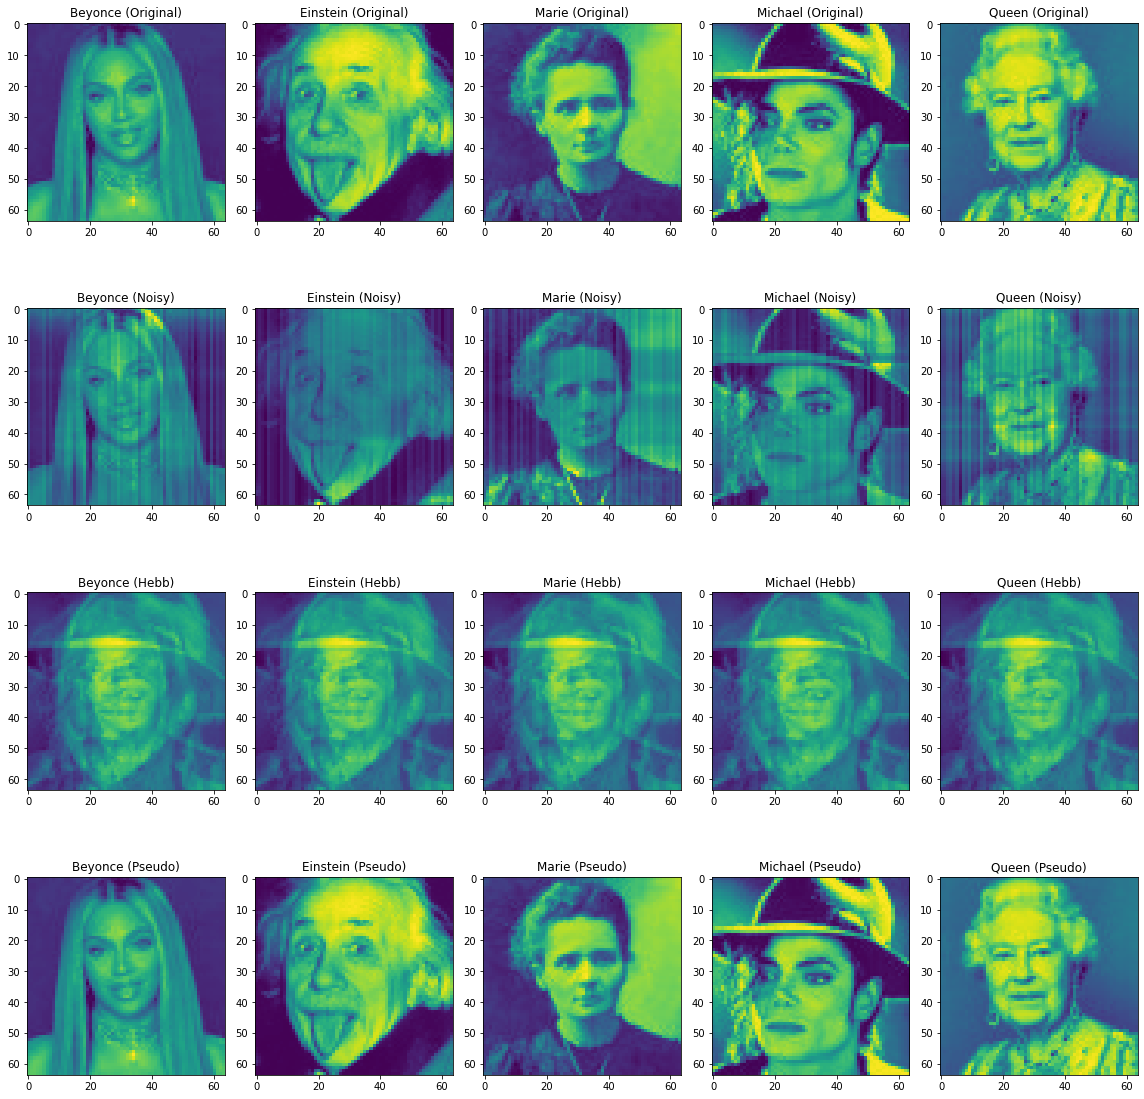

In [428]:
plt.figure(figsize=(16, 16))  # Adjust the figure size for the total number of rows

# First row: Original images
images = [beyonce, einstein, marie, michael, queen]
titles = ['Beyonce (Original)', 'Einstein (Original)', 'Marie (Original)', 'Michael (Original)', 'Queen (Original)']

for i in range(5):
    plt.subplot(4, 5, i+1)
    plt.imshow(np.reshape(images[i], (64, 64)))
    plt.title(titles[i])

# Second row: Noisy images
images_noisy = [beyonce_noisy, einstein_noisy, marie_noisy, michael_noisy, queen_noisy]
titles_noisy = ['Beyonce (Noisy)', 'Einstein (Noisy)', 'Marie (Noisy)', 'Michael (Noisy)', 'Queen (Noisy)']

for i in range(5):
    plt.subplot(4, 5, 5 + i+1)  # Fixed the index here
    plt.imshow(np.reshape(images_noisy[i], (64, 64)))
    plt.title(titles_noisy[i])

# Third row: Hebb
images_hebb = [beyonce_hebb, einstein_hebb, marie_hebb, michael_hebb, queen_hebb]
titles_hebb = ['Beyonce (Hebb)', 'Einstein (Hebb)', 'Marie (Hebb)', 'Michael (Hebb)', 'Queen (Hebb)']

for i in range(5):
    plt.subplot(4, 5, 10 + i+1)  # Fixed the index here
    plt.imshow(np.reshape(images_hebb[i], (64, 64)))
    plt.title(titles_hebb[i])

# Fourth row: Pseudo
images_pseudo = [beyonce_pseudo, einstein_pseudo, marie_pseudo, michael_pseudo, queen_pseudo]
titles_pseudo = ['Beyonce (Pseudo)', 'Einstein (Pseudo)', 'Marie (Pseudo)', 'Michael (Pseudo)', 'Queen (Pseudo)']

for i in range(5):
    plt.subplot(4, 5, 15 + i+1)  # Fixed the index here
    plt.imshow(np.reshape(images_pseudo[i], (64, 64)))
    plt.title(titles_pseudo[i])

#plt.subplots_adjust(hspace=0.0005)
plt.tight_layout()
plt.show()

## Correlation Tables 

In [429]:
# Sample DataFrames for Hebbian and Pseudo Inverse Correlation with celebrities
tb_hebb_celeb = pd.DataFrame(data_hebb_celeb)
tb_hebb_celeb.columns = ['Output 1','Output 2','Output 3','Output 4','Output 5']
tb_hebb_celeb.index = ['Beyonce','Einstein','Marie','Michael','Queen']

tb_pseudo_celeb = pd.DataFrame(data_pseudo_celeb)
tb_pseudo_celeb.columns = ['Output 1','Output 2','Output 3','Output 4','Output 5']
tb_pseudo_celeb.index = ['Beyonce','Einstein','Marie','Michael','Queen']

pd.set_option('display.float_format', '{:.6f}'.format)

def create_vertically_aligned_tables(hebbian, pseudo_inverse):
    hebb_table = hebbian.to_html(classes='hebb')
    pseudo_table = pseudo_inverse.to_html(classes='pseudo')
    
    html_str = f"""
    <h3>Hebbian Correlation</h3>
    {hebb_table}
    <br><br>
    <h3>Pseudo Inverse Correlation</h3>
    {pseudo_table}
    """

    display(HTML(html_str))

# Call the function to display the tables
create_vertically_aligned_tables(tb_hebb_celeb, tb_pseudo_celeb)


,Output 1,Output 2,Output 3,Output 4,Output 5
Beyonce,0.569406,0.522380,0.509431,0.526543,0.557722
Einstein,0.735766,0.797548,0.735228,0.682326,0.732217
Marie,0.466690,0.482739,0.555470,0.444130,0.471390
Michael,0.400068,0.360394,0.385669,0.531216,0.397305
Queen,0.516763,0.484436,0.468984,0.457546,0.529766
,Output 1,Output 2,Output 3,Output 4,Output 5
Beyonce,0.999755,0.218601,-0.050011,0.145430,0.446315
Einstein,0.207207,0.999886,0.370419,0.007250,0.233385
Marie,-0.090482,0.372120,0.999640,-0.052042,-0.045168
Michael,0.141284,-0.002912,-0.063376,0.999824,-0.066524
